# Régression Linéaire Simple avec  Gradient descent

<p> Pour maîtriser l’apprentissage supervisé, il faut absolument comprendre et connaitre les 4 notions suivantes :
	<ol>
            <li>Le Dataset</li>
            <li>Le Modèle et ses paramèTres</li>
            <li>La Fonction Coût</li>
            <li>L'Algorithme d'apprentissage</li>
    </ol>
    
<h1><b> 1. Dataset: </b> </h1>
             Lorsque l’on fournit à une machine beaucoup d’exemples (x,y) dans le but de lui faire
apprendre la relation qui relie x à 
<img src="image1.png" >

<p> En Machine Learning, on compile ces exemples (x,y) dans un tableau que l’on appelle Dataset, La variable y porte le nom de target (la cible). C’est la valeur que l’on cherche à prédire. La variable x porte le nom de feature (facteur). Un facteur influence la valeur de y et on a en général beaucoup de features (x1,x2… ) dans notre Dataset que l’on regroupe dans une matrice X.
<img src="image2.png" >

<h1><b> 2. Le modèle: </b> </h1>    
<p> En Machine Learning, on développe un modèle à partir de ce Dataset. Il peut s’agir d’un modèle linéaire ou bien un modèle non-linéaire. On note a,b,c les paramètres du modelé. $ F(\theta) =  X.\theta  $
<img src="image3.png" >

<h1><b>3. Fonction cout :</b> </h1>  
<p>Les erreurs de notre modèle - la Fonction Coût à noter est qu’un modèle nous retourne des erreurs par rapport à notre Dataset. On appelle Fonction Coût l’ensemble de ces erreurs (le plus souvent on prend la moyenne quadratique des erreurs)
<img src="image4.png" >

<p>On mesure les erreurs du modele sur le Dataset X, y en implémenterl'erreur quadratique moyenne,  **Mean Squared Error (MSE)** en anglais.

$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $

Ensuite, on teste notre fonction, pour voir s'il n'y a pas de bug

<p>un bon modèle, c’est avoir un modèle qui nous donne de petite erreurs, donc une petite Fonction Coût!
 <img src="image5.png" >   
    
<h1><b>4. Algorithme d'apprentissage: Apprendre, c’est minimiser la Fonction Coût</b> </h1>  
<p>Apprentissage: optimisation des paramètres pour minimiser la Fonction Coût (erreur sur les exemples ) Pour cela, on utilise un algorithme d’apprentissage, l’exemple le plus courant étant l’algorithme de Gradient Descent,

<h1>Gradients et Descente de Gradient</h1>
 <img src="gd.gif" >  

On implémente la formule du gradient pour la **MSE**

$\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$

Ensuite on utilise cette fonction dans la descente de gradient:

$\theta(i+1) = \theta(i) - \alpha \frac{\partial J(\theta) }{\partial \theta}$
    

## Pratique

In [4]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

C:\Users\Hamza\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1. Dataset
Génération de données aléatoires avec une tendance linéaire avec make_regression: on a un dataset $(x, y)$ qui contient 100 exemples, et une seule variable $x$. Note:

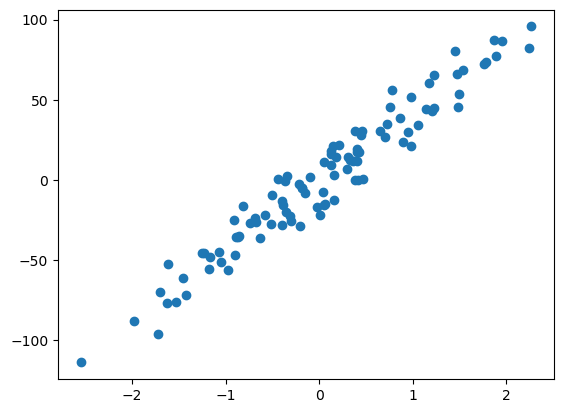

In [5]:
np.random.seed(0) # pour toujours reproduire le meme dataset
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y) # afficher les résultats. X en abscisse et y en ordonnée

In [6]:
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [7]:
y = y.reshape(y.shape[0], 1)
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


Création de la matrice X qui contient la colonne de Biais. Pour ca, on colle l'un contre l'autre le vecteur x et un vecteur 1 (avec np.ones) de dimension égale a celle de x

In [40]:
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)
X[:][:5]

(100, 2)


array([[-0.35955316,  1.        ],
       [ 0.97663904,  1.        ],
       [ 0.40234164,  1.        ],
       [-0.81314628,  1.        ],
       [-0.88778575,  1.        ]])

Création du vecteur  $\theta$, initialisé avec des coefficients aléatoires. Ce vecteur est de dimension (2, 1).

In [9]:
np.random.seed(0) 
theta = np.random.randn(2, 1)
theta

array([[1.76405235],
       [0.40015721]])

# 2. Modele Linéaire
On implémente un modele $F = X.\theta$, puis on teste le modele pour voir s'il n'y a pas de bug. En plus, cela permet de voir a quoi ressemble le modele initial, défini par la valeur de $\theta$

In [10]:
def model(X, theta):
    return X.dot(theta)

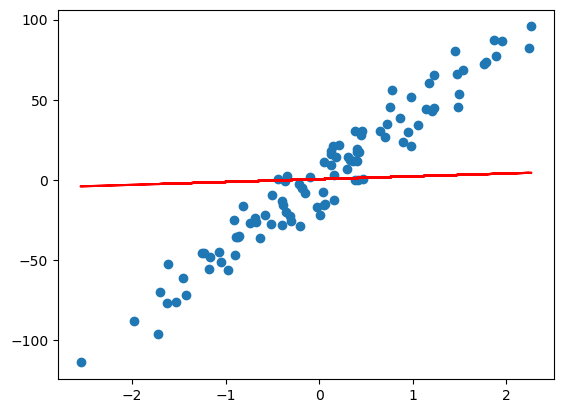

In [11]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

# 3. Fonction Cout :  Erreur Quadratique moyenne

In [12]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [13]:
cost_function(X, y, theta)

905.6306841935502

# 4. Gradients et Descente de Gradient

In [14]:
def gradient(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [15]:
def gradient_descent(X, y, theta, alpha, iteration):
    
    apprentissage_hist = np.zeros(iteration)
    for i in range(0, iteration):
        print(" iteration N : ", i)
        theta = theta - alpha * gradient(X, y, theta) 
        print(" theta = : ", theta)
        apprentissage_hist[i] = cost_function(X, y , theta)
        
    return theta, apprentissage_hist

# 5. Phase d'entrainement
On définit un **nombre d'itérations**, ainsi qu'un **pas d'apprentissage $\alpha$**, et c'est partit !

Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [16]:
iteration = 500
alpha = 0.01

theta_1, apprent_hist = gradient_descent(X, y, theta, alpha, iteration)

 iteration N :  0
 theta = :  [[2.17980727]
 [0.41244861]]
 iteration N :  1
 theta = :  [[2.59131663]
 [0.42436844]]
 iteration N :  2
 theta = :  [[2.99862392]
 [0.43592296]]
 iteration N :  3
 theta = :  [[3.40177219]
 [0.44711833]]
 iteration N :  4
 theta = :  [[3.80080406]
 [0.45796063]]
 iteration N :  5
 theta = :  [[4.19576169]
 [0.46845586]]
 iteration N :  6
 theta = :  [[4.58668684]
 [0.47860991]]
 iteration N :  7
 theta = :  [[4.97362081]
 [0.48842862]]
 iteration N :  8
 theta = :  [[5.35660449]
 [0.49791773]]
 iteration N :  9
 theta = :  [[5.73567834]
 [0.50708289]]
 iteration N :  10
 theta = :  [[6.11088242]
 [0.51592968]]
 iteration N :  11
 theta = :  [[6.48225637]
 [0.52446361]]
 iteration N :  12
 theta = :  [[6.84983941]
 [0.53269008]]
 iteration N :  13
 theta = :  [[7.21367037]
 [0.54061444]]
 iteration N :  14
 theta = :  [[7.57378769]
 [0.54824196]]
 iteration N :  15
 theta = :  [[7.9302294 ]
 [0.55557783]]
 iteration N :  16
 theta = :  [[8.28303315]
 [0.5

In [17]:
theta_1

array([[42.36217899],
       [-0.72742991]])

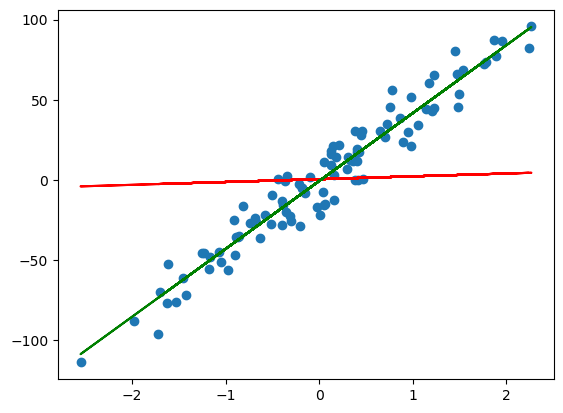

In [18]:
plt.scatter(x, y)
y_estimee = model(X, theta_1)
plt.plot(x, model(X, theta), c='r')
plt.plot(x, y_estimee, c='g')

## Courbe d'apprentissage du model

In [19]:
cost_function(X, y, theta), cost_function(X, y, theta_1)

(905.6306841935502, 57.121902458919806)

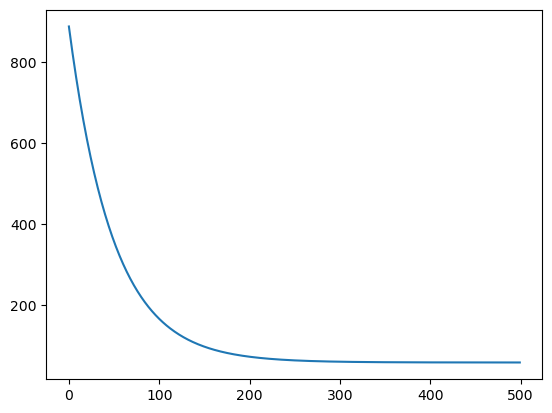

In [20]:
plt.plot(range(iteration), apprent_hist)

# Evaluation de modèle

# Pour evaluer le model, on utilise la methode des moindres carree
$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$ 


In [21]:
def coefficient_r2(y_reele, y_estimee):
    u = ((y_reele - y_estimee)**2).sum()
    v = ((y_reele - y_reele.mean())**2).sum()
    return 1 - u/v

In [23]:
coefficient_r2(y, y_estimee)

0.9416925629277508

## Régression Linéaire Multiple avec Gradient descent

# 1. Régression Polynomiale: 1 variable $x_1$

## 1.1 Dataset

Pour développer un modèle polynomial à partir des équations de la régression linéaire, il suffit d'ajouter des degrés de polynome dans les colonnes de la matrice $X$ ainsi qu'un nombre égal de lignes dans le vecteur $\theta$.

Dans ce notebook, nous allons développer un ploynome de degré 2: $f(x) = ax^2 + bx + c$. Pour celà, il faut développer les matrices suivantes:

$X = \begin{bmatrix} x^{2 (1)} & x^{(1)} & 1 \\ x^{2 (2)} & x^{(2)} & 1 \\... & ... & ... \\ x^{2 (m)} & x^{(m)} & 1 \end{bmatrix}$

$\theta = \begin{bmatrix} a\\b\\c \end{bmatrix}$

$y = \begin{bmatrix} y^{(1)}\\ y^{(2)}\\...\\y^{(m)} \end{bmatrix}$ *note : le vecteur $y$ reste le meme que pour la régression linéaire*

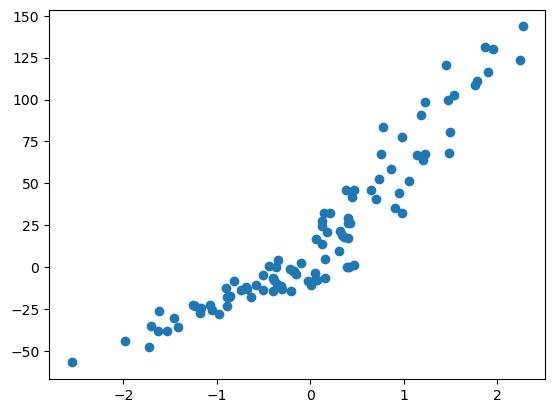

In [83]:
np.random.seed(0)

x, y = make_regression(n_samples=100, n_features=1, noise = 10)
y = y + abs(y/2)

plt.scatter(x, y) 

In [84]:
print(x.shape)
print(y.shape)

y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100,)
(100, 1)


In [85]:
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X)) 

print(X.shape)
X[:][:5]

(100, 3)


array([[ 0.12927848, -0.35955316,  1.        ],
       [ 0.95382381,  0.97663904,  1.        ],
       [ 0.1618788 ,  0.40234164,  1.        ],
       [ 0.66120688, -0.81314628,  1.        ],
       [ 0.78816353, -0.88778575,  1.        ]])

In [86]:
theta = np.random.randn(3, 1)
theta

array([[-0.63743703],
       [-0.39727181],
       [-0.13288058]])

### On prend les meme elements que precedent

In [87]:
# La meme fonction cout
#cost_function(X, y, theta)

# meme gradient
#gradient(X, y, theta)

#meme gradient descent
#gradient_descent(X, y, theta, alpha, iteration)

#meme model
#model(X, theta)[:5]

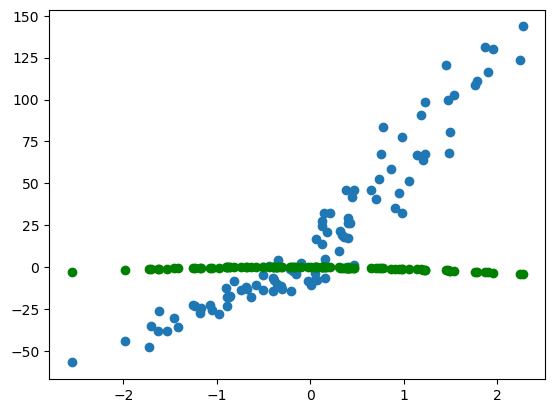

In [88]:
plt.scatter(x, y)
plt.scatter(x, model(X, theta), c='g')

In [89]:
# meme params pour gradient descent
alpha = 0.01

theta_1, app_hist= gradient_descent(X, y, theta, alpha, iteration)

 iteration N :  0
 theta = :  [[-0.22065097]
 [ 0.05962872]
 [ 0.07007265]]
 iteration N :  1
 theta = :  [[0.18183678]
 [0.51096761]
 [0.26647435]]
 iteration N :  2
 theta = :  [[0.57049358]
 [0.9568323 ]
 [0.45653913]]
 iteration N :  3
 theta = :  [[0.94577165]
 [1.39730837]
 [0.64047461]]
 iteration N :  4
 theta = :  [[1.30810862]
 [1.83247953]
 [0.8184817 ]]
 iteration N :  5
 theta = :  [[1.65792796]
 [2.26242771]
 [0.99075477]]
 iteration N :  6
 theta = :  [[1.99563947]
 [2.68723308]
 [1.1574819 ]]
 iteration N :  7
 theta = :  [[2.32163967]
 [3.10697412]
 [1.31884505]]
 iteration N :  8
 theta = :  [[2.63631229]
 [3.52172766]
 [1.47502026]]
 iteration N :  9
 theta = :  [[2.94002864]
 [3.93156891]
 [1.62617789]]
 iteration N :  10
 theta = :  [[3.23314802]
 [4.33657153]
 [1.77248273]]
 iteration N :  11
 theta = :  [[3.5160181 ]
 [4.73680763]
 [1.91409422]]
 iteration N :  12
 theta = :  [[3.78897532]
 [5.13234787]
 [2.05116664]]
 iteration N :  13
 theta = :  [[4.05234523]


In [90]:
theta_1

array([[ 8.77997881],
       [41.94834442],
       [ 7.85370184]])

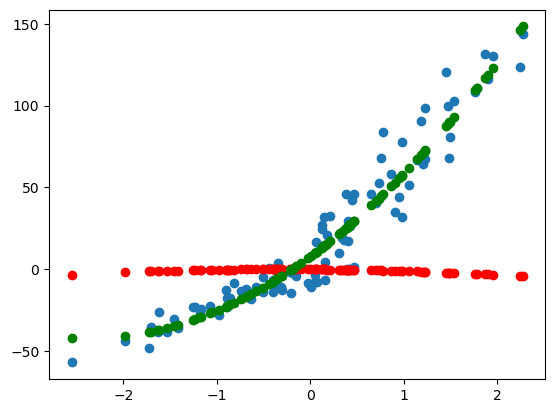

In [92]:
plt.scatter(x, y)
plt.scatter(x, model(X, theta), c='r')
plt.scatter(x, model(X, theta_1), c='g')

# 2. Régression Multiples Variables
C'est lorsqu'on integre plusieures variables $x_1, x_2, x_3, etc.$ à notre modèle que les choses commencent à devenir vraiment intéressantes. C'est peut-être aussi à ce moment que les gens commencent parfois à parler *d'intelligence artificielle*, car il est difficile pour un être humain de se représenter dans sa tête un modèle à plusieurs dimensions (nous n'évoluons que dans un espace 3D). On se dit alors que la machine, quant à elle, arrive à se réprésenter ces espaces, car elle y trouve le meilleur modèle (avec la descente de gradient) et les gens disent donc qu'elle est intelligente, alors que ce ne sont que des mathématiques.

## 2.1 Dataset


Dans ce notbook, nous allons créer un modèle à 2 variables $x_1, x_2$. Pour cela, il suffit d'injecter les différentes variables $x_1, x_2$ (les **features** en anglais) dans la matrice $X$, et de créer le vecteur $\theta$ qui s'accorde avec:



$X = \begin{bmatrix} x^{(1)}_1 & x^{(1)}_2 & 1 \\ ... & ... & ... \\ x^{(m)}_1 & x^{(m)}_2 & 1 \end{bmatrix}$

$\theta = \begin{bmatrix} a\\b\\c \end{bmatrix}$

$y = \begin{bmatrix} y^{(1)}\\...\\y^{(m)} \end{bmatrix}$ *note : le vecteur $y$ reste le meme que pour la régression linéaire*


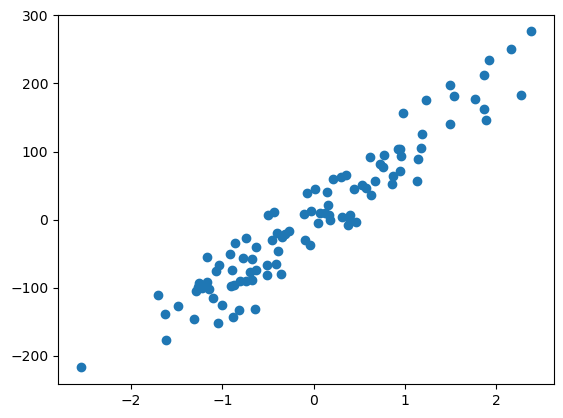

In [96]:
np.random.seed(0)

x, y = make_regression(n_samples=100, n_features=2, noise = 10) 

plt.scatter(x[:,1], y)

<IPython.core.display.Javascript object>


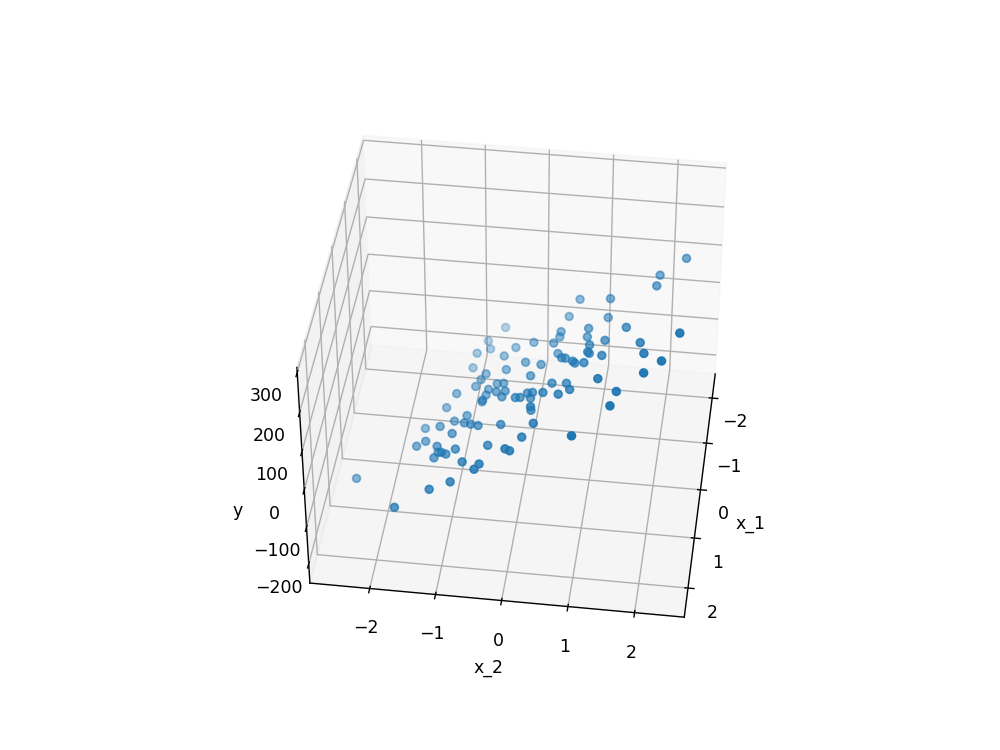

Text(0.5, 0, 'y')

In [97]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook 

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y) # affiche en 3D la variable x_1, x_2, et la target y

# affiche les noms des axes
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')

In [98]:
print(x.shape)
print(y.shape)

y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 2)
(100,)
(100, 1)


In [99]:
X = np.hstack((x, np.ones((x.shape[0], 1))))

print(X.shape)
print(X[:5])

(100, 3)
[[ 1.05445173 -1.07075262  1.        ]
 [-0.36274117 -0.63432209  1.        ]
 [-0.85409574  0.3130677   1.        ]
 [ 1.3263859   0.29823817  1.        ]
 [-0.4615846  -1.31590741  1.        ]]


In [100]:
theta = np.random.randn(3, 1)
theta

array([[-0.82646112],
       [ 0.78420863],
       [-0.1954172 ]])

## On utilise les memes elements

In [101]:
theta_2, hist = gradient_descent(X, y, theta, alpha, iteration)

 iteration N :  0
 theta = :  [[-0.54067217]
 [ 1.78481157]
 [-0.15740753]]
 iteration N :  1
 theta = :  [[-0.25769403]
 [ 2.77503621]
 [-0.12017642]]
 iteration N :  2
 theta = :  [[ 0.02250139]
 [ 3.75499022]
 [-0.08371217]]
 iteration N :  3
 theta = :  [[ 0.29994189]
 [ 4.72478015]
 [-0.04800323]]
 iteration N :  4
 theta = :  [[ 0.57465499]
 [ 5.68451147]
 [-0.01303822]]
 iteration N :  5
 theta = :  [[0.84666794]
 [6.63428854]
 [0.02119409]]
 iteration N :  6
 theta = :  [[1.11600769]
 [7.57421463]
 [0.05470481]]
 iteration N :  7
 theta = :  [[1.38270094]
 [8.50439195]
 [0.08750485]]
 iteration N :  8
 theta = :  [[1.64677411]
 [9.42492165]
 [0.11960503]]
 iteration N :  9
 theta = :  [[ 1.90825336]
 [10.33590383]
 [ 0.15101598]]
 iteration N :  10
 theta = :  [[ 2.16716456]
 [11.23743754]
 [ 0.1817482 ]]
 iteration N :  11
 theta = :  [[ 2.42353334]
 [12.12962081]
 [ 0.21181207]]
 iteration N :  12
 theta = :  [[ 2.67738507]
 [13.01255066]
 [ 0.2412178 ]]
 iteration N :  13
 t

<IPython.core.display.Javascript object>


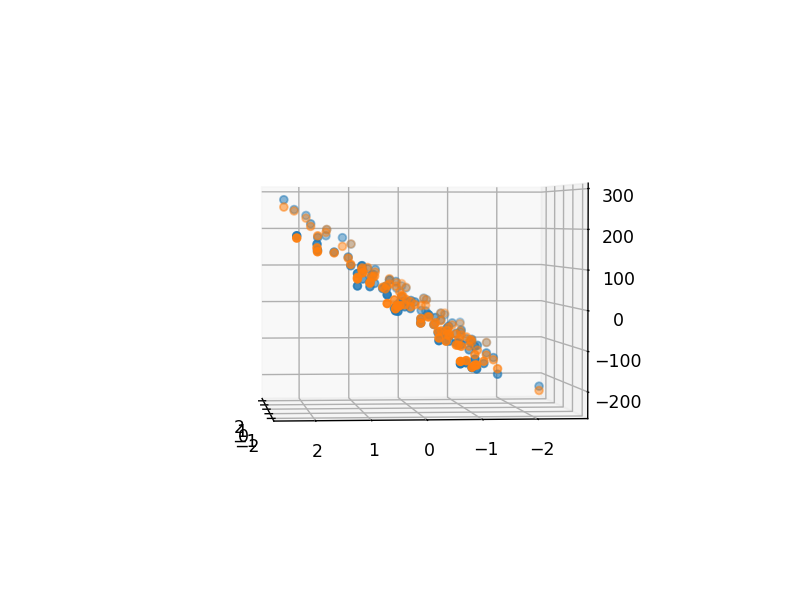

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], model(X, theta_2))